In [1]:
import numpy as np
import matplotlib.pyplot as plt

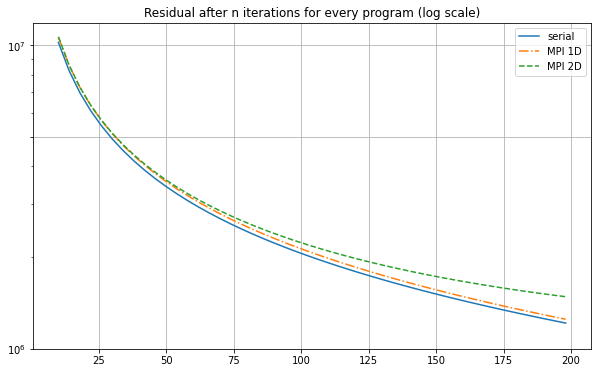

In [96]:
def parseFile(fileName):
    with open(fileName) as fp:
        line = fp.readline()
        line = line.replace("|residual|=", " ")
        vals = []
        while line:
            line = fp.readline()
            line = line.replace("|residual|=", " ")
            vals.append(line.split())

        return [float(vals[i][0]) for i in range(len(vals)-1)], [float(vals[i][1]) for i in range(len(vals)-1)]

(serial_iter, serial_vals) = parseFile("../results/residuals_serial.txt")
(mpi_iter, mpi_vals) = parseFile("../results/residuals_mpi.txt")
(mpi2d_iter, mpi2d_vals) = parseFile("../results/residuals_mpi2D.txt")

plt.rcParams["figure.figsize"] = (10,6)
plt.plot(serial_iter, serial_vals, label="serial")
plt.plot(mpi_iter, mpi_vals, "-.", label="MPI 1D")
plt.plot(mpi2d_iter, mpi2d_vals, "--", label="MPI 2D")
plt.title("Residual after n iterations for every program (log scale)")
plt.yscale("log")
plt.grid()
plt.yticks([1e7, 5*1e6, 1e6])
plt.legend()
plt.savefig("../results/residual_vs_iter.png")
